<a href="https://colab.research.google.com/github/NourhanDeifSayed/Predicting-Bankruptcy/blob/main/Nourhan_Deif_202201959_AdaBoost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [83]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b56417fc34dc08f582218aa597d70324d93abd2f11e5fb1d54e681b302d9a96a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import shap
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay

In [10]:
df = pd.read_csv('data.csv')

In [11]:
print(df.shape)

(6819, 96)


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [13]:
print(df.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

In [14]:
print(df['Bankrupt?'].value_counts(normalize=True))

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [15]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [16]:
df.isnull().sum().sort_values(ascending=False)

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [17]:
num_features = X.shape[1]
print("Number of features:", num_features)

Number of features: 95


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [20]:
X_imputed = imputer.fit_transform(X)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **AdaBoost Model**



*   AdaBoost is a machine learning algorithm that improves the performance of weak models by combining multiple simple models to create a stronger one. In this case, Random Forest is used as a weak model inside AdaBoost.


*   The weak model is trained on the data.



*   After training, AdaBoost tries to improve the mistakes made by the weak model. It focuses on the data points that were classified incorrectly and gives them higher weight in the next iteration.


*  AdaBoost enhances weak models and makes them stronger, achieving better performance than the individual weak models.




In [57]:
base_estimator = RandomForestClassifier(n_estimators=10, random_state=42)

In [58]:
ada_boost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

In [59]:
ada_boost_model.fit(X_train_scaled, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   random_state=42)

In [60]:
y_pred = ada_boost_model.predict(X_test_scaled)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [62]:
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")
print(f"AdaBoost Classifier Precision: {precision:.4f}")
print(f"AdaBoost Classifier Recall: {recall:.4f}")
print(f"AdaBoost Classifier F1-score: {f1:.4f}")

AdaBoost Classifier Accuracy: 0.9648
AdaBoost Classifier Precision: 1.0000
AdaBoost Classifier Recall: 0.0588
AdaBoost Classifier F1-score: 0.1111


In [63]:
cm = confusion_matrix(y_test, y_pred)

# The confusion matrix

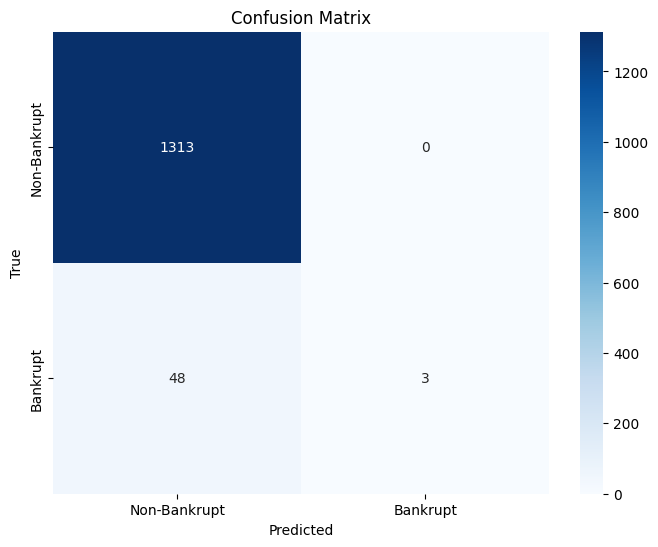

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Interpretation**

*   True Negatives (TN): 1313 correctly predicted non-bankrupt companies.


*   False Positives (FP): 0 incorrectly predicted non-bankrupt companies as bankrupt.

*   True Positives (TP): 3 correctly predicted bankrupt companies.



*   False Negatives (FN): 48 incorrectly predicted bankrupt companies as non-bankrupt.


The model performs well at predicting non-bankrupt companies (true negatives), but it struggles with bankrupt companies, as it only detected 3 out of 51 bankrupt cases. The false negative rate is high.

# **ROC curve**

ROC Curve: The curve represents the trade-off between the True Positive and False Positive.

In [65]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

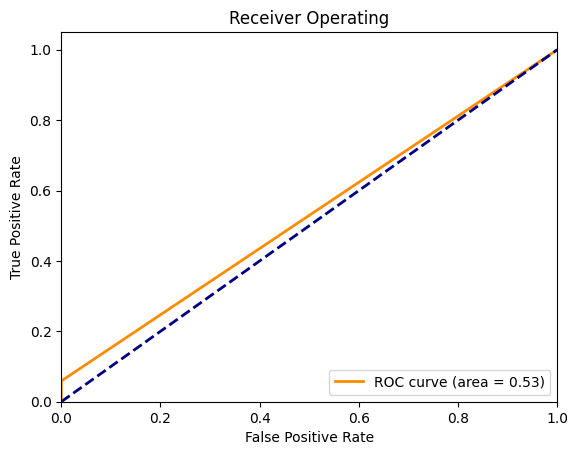

In [100]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating')
plt.legend(loc="lower right")
plt.show()

**Interpretation**

*   Area Under the Curve (AUC): The AUC is 0.53, which suggests that the model performs only slightly better than random guessing. An AUC value close to 0.5 indicates that the model is not distinguishing between the classes effectively.



# **Learning Curve**

In [67]:
train_sizes, train_scores, test_scores = learning_curve(ada_boost_model, X_train_scaled, y_train, cv=5)

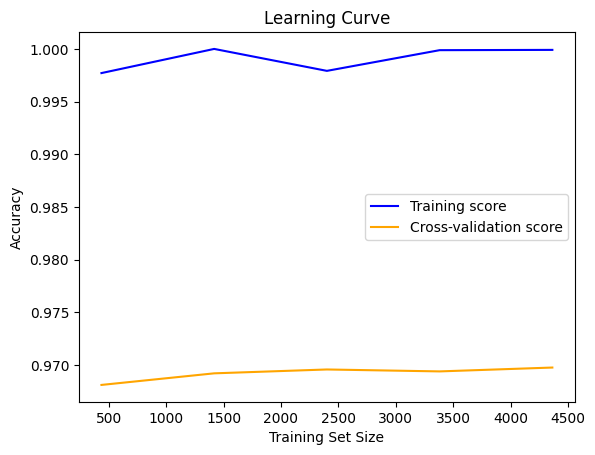

In [68]:
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score", color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Interpretation**

*   Overfitting: The training accuracy is very high, but the cross-validation score is much lower and stable. This suggests that the model may be overfitting to the training data, meaning it is memorizing the training examples rather than generalizing well to unseen data.



**Predicted vs Actual Distribution**

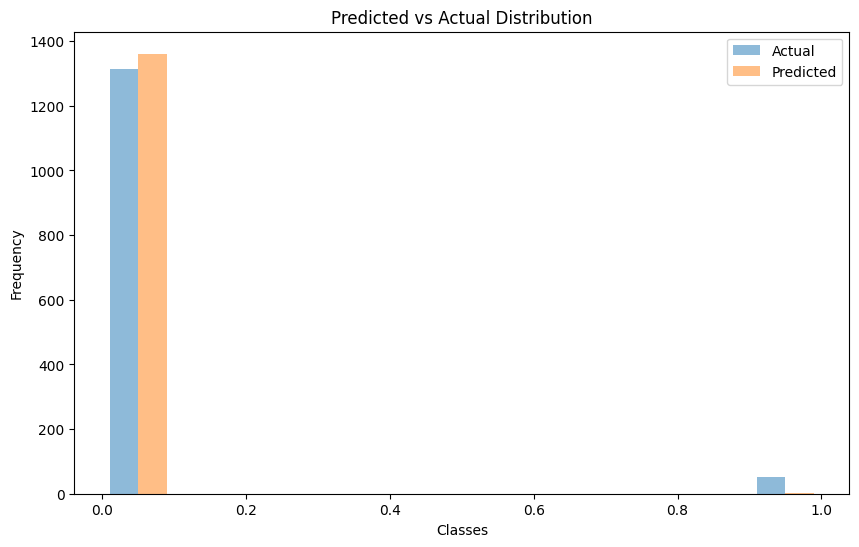

In [69]:
plt.figure(figsize=(10, 6))
plt.hist([y_test, y_pred], bins=10, alpha=0.5, label=['Actual', 'Predicted'])
plt.legend(loc='best')
plt.title('Predicted vs Actual Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

**Interpretation**


*   Imbalance in predictions: The model is not predicting the class (Bankrupt) well, as shown by the high frequency of class 0 in both actual and predicted distributions.



*  Model bias: The model is biased towards predicting Non-Bankrupt for most samples, which likely contributes to the poor performance in detecting bankrupt companies.


**Model Performance Metrics**

<ipython-input-70-3a76701f997c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='coolwarm')


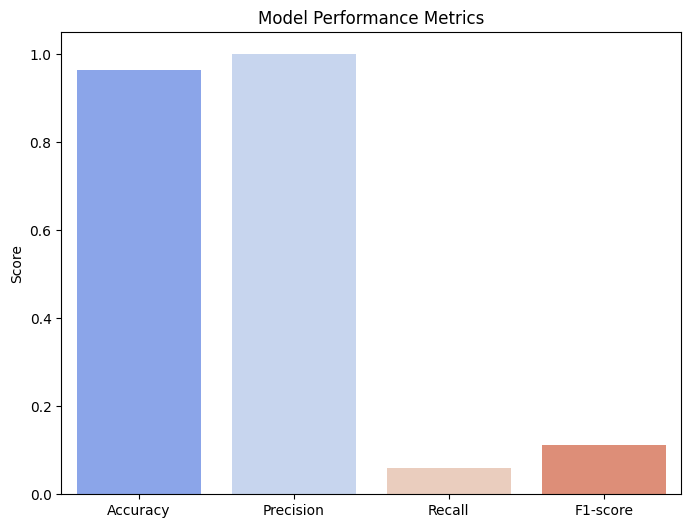

In [70]:
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='coolwarm')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

**Interpretation**

*   High Accuracy is not indicative of good performance because the model is likely predicting theclass (Non-Bankrupt) most of the time.

*   Poor Recall and F1-Score show that the model is struggling to detect bankrupt companies.



**SHAP**

In [80]:
explainer = shap.TreeExplainer(ada_boost_model.estimators_[0])
shap_values = explainer.shap_values(X_test)

<Figure size 640x480 with 0 Axes>

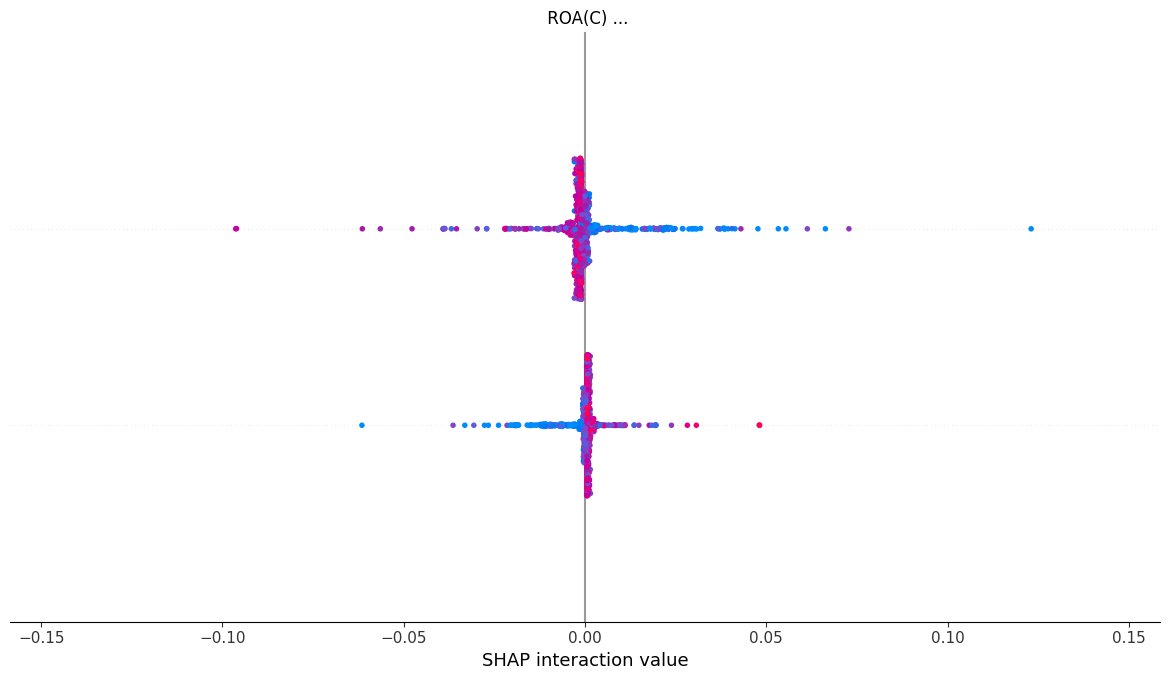

In [81]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

**Interpretation**




*   SHAP interaction value: This plot shows how the interaction between the feature (ROA(C)) and the model's prediction contributes to the final output.

*   X-axis: Represents the SHAP interaction values.

*   Y-axis: The specific feature (ROA(C)) whose interactions with other features.


*  Color of points: the color indicates the value of the feature, with blue indicating lower values and pink indicating higher values of ROA(C).




*   Spread of Data Points: Most of the data points are around the center so the feature ROA(C) has a limited effect on the model's output for most instances.



*   Feature Importance: The SHAP interaction values suggest that ROA(C) is interacting with other features in a way that influences the model's prediction.


**LIME**

In [85]:
lime_explainer = LimeTabularExplainer(X_train, training_labels=y_train, mode="classification")

In [90]:
idx = 7
lime_explanation = lime_explainer.explain_instance(X_test[idx], ada_boost_model.predict_proba)

In [91]:
lime_explanation.show_in_notebook()

**Interpretation**

In [94]:
features = [0, 1]

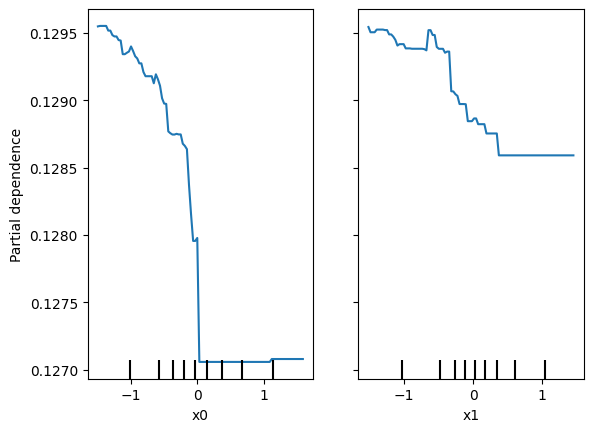

In [98]:
PartialDependenceDisplay.from_estimator(ada_boost_model, X_train, features)
plt.show()

**Interpretation**



*   Feature x0: When x0 is near 0, small changes cause big changes in the model’s prediction.


*  Feature x1: As x1 changes, the model’s prediction changes smoothly.This means that x1 affects the prediction in a more predictable and continuous .



In [105]:
feature_importance = ada_boost_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

In [106]:
top_n = 20
top_features = feature_importance_sorted.head(top_n)

<ipython-input-107-eb8a327d17b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')


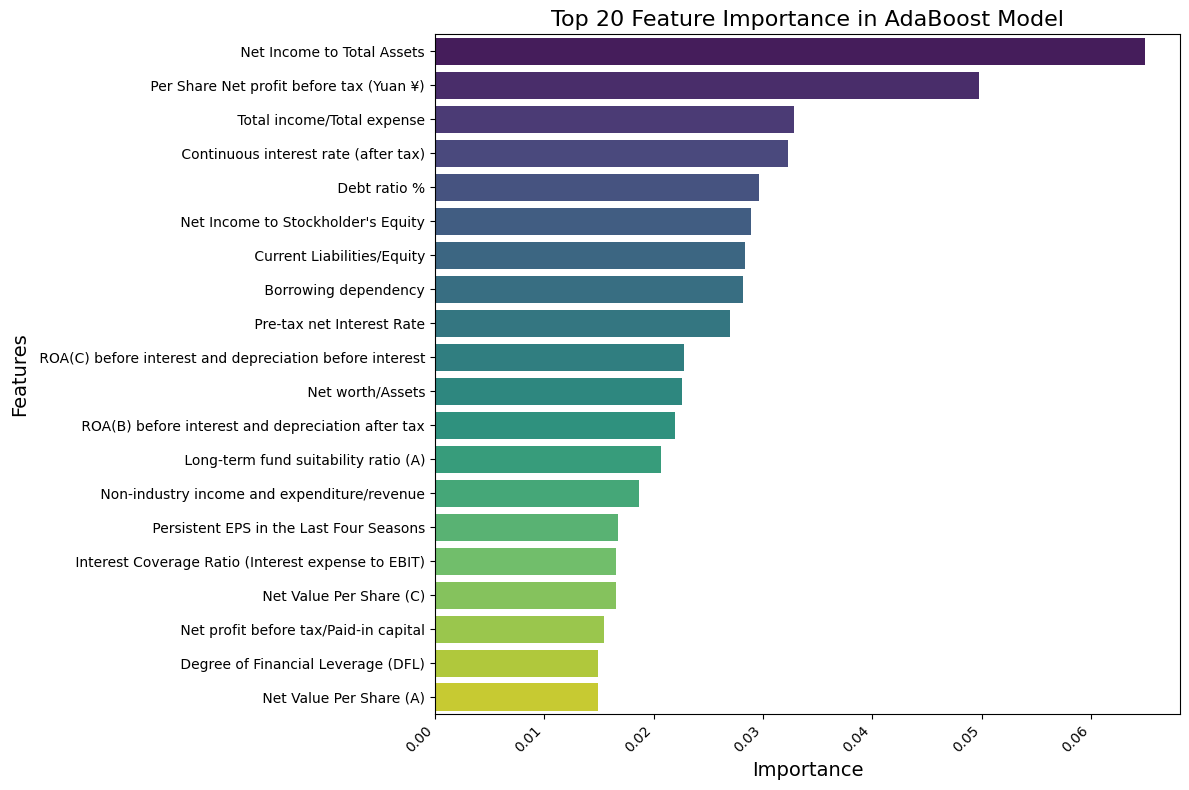

In [107]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')
plt.title('Top 20 Feature Importance in AdaBoost Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation**

Most Important Features:

The feature **Net Income to Total Assets** has the highest importance, meaning it plays the biggest role in predicting the model's output.

The second most important feature is **Per Share Net profit before tax **(Yuan ¥), followed by **Total income/Total expense**, which also significantly influence the predictions.

**Apply SMOTE to balance the dataset**




*   SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset, specifically to address the issue of class imbalance. The model previously struggled with detecting bankrupt companies because the non-bankrupt class was dominant.

*   SMOTE generates synthetic examples of the class (bankrupt companies) to create a more balanced dataset, making the model focus better on predicting both classes.



In [110]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [112]:
base_estimator = RandomForestClassifier(n_estimators=10, random_state=42)
ada_boost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
ada_boost_model.fit(X_train_scaled, y_train_resampled)
y_pred = ada_boost_model.predict(X_test_scaled)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [114]:
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")
print(f"AdaBoost Classifier Precision: {precision:.4f}")
print(f"AdaBoost Classifier Recall: {recall:.4f}")
print(f"AdaBoost Classifier F1-score: {f1:.4f}")

AdaBoost Classifier Accuracy: 0.9531
AdaBoost Classifier Precision: 0.4133
AdaBoost Classifier Recall: 0.6078
AdaBoost Classifier F1-score: 0.4921


# **Confusion Matrix**

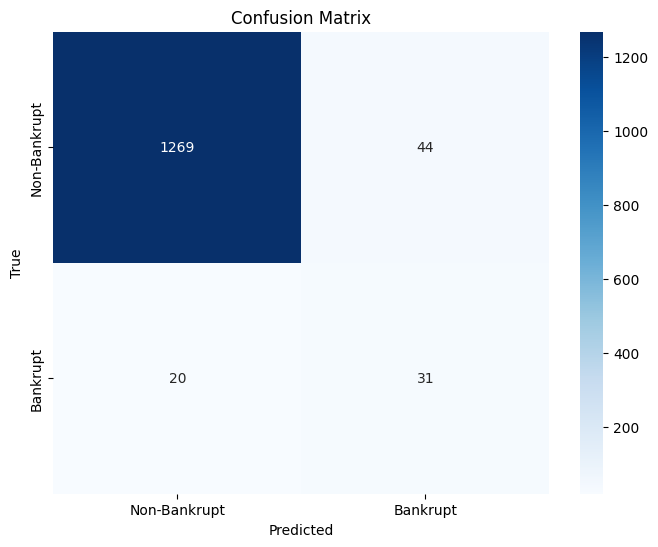

In [115]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



*   After applying SMOTE, the model's performance improved significantly. Now, there are only 44 false positives and 20 false negatives.

*  The confusion matrix now shows more accurate predictions for the bankrupt class.



**ROC Curve**

In [116]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

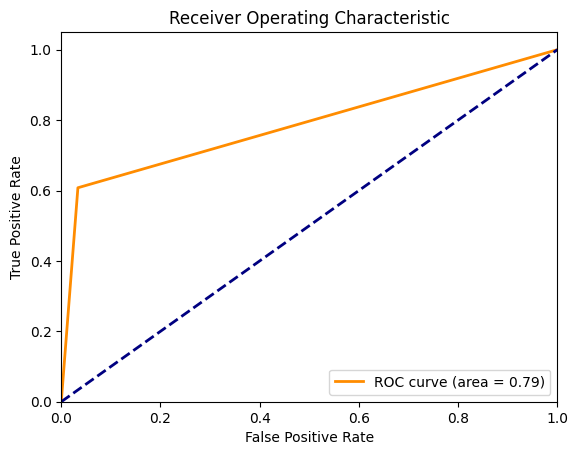

In [117]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



*   The ROC curve now has a significantly higher AUC of 0.79, which means the model's ability to discriminate between bankrupt and non-bankrupt companies is much better.


*   The ROC curve improvement reflects better model performance in both detecting bankrupt companies and avoiding false positives.

